In [7]:
import cv2
from matplotlib import pyplot as plt

In [8]:
def show_images(img_arr_in, img_arr_ref, img_arr_reg):
    plt.figure(figsize=(15, 5))

    # Hiển thị ảnh đầu vào
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img_arr_in, cv2.COLOR_BGR2RGB))
    plt.title('Input Image')
    plt.axis('off')

    # Hiển thị ảnh tham chiếu
    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(img_arr_ref, cv2.COLOR_BGR2RGB))
    plt.title('Reference Image')
    plt.axis('off')

    # Hiển thị ảnh đầu ra
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(img_arr_reg, cv2.COLOR_BGR2RGB))
    plt.title('Output Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

def save_image(img):
   cv2.imwrite('../data/out_images/comic_result.png', img)


In [9]:
image = cv2.imread('../data/inp_images/tower.jpeg')

In [10]:
# image gray outlines
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray, 5)
outlines = cv2.adaptiveThreshold(gray, 255,
                                  cv2.ADAPTIVE_THRESH_MEAN_C,
                                  cv2.THRESH_BINARY, 9, 9)

In [11]:
# make cartoon of you image
color = cv2.bilateralFilter(image, 9, 250, 250)
comic  = cv2.bitwise_and(color, color, mask=outlines)

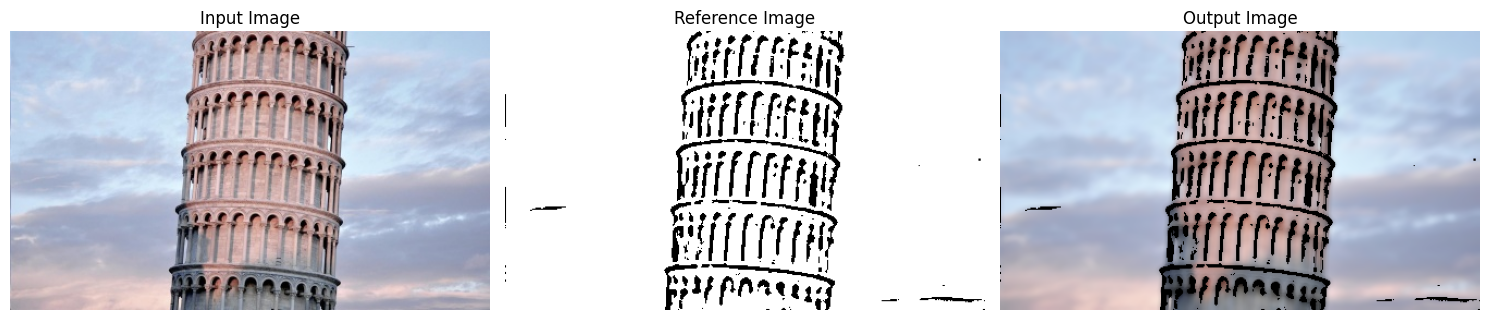

In [12]:
show_images(image, outlines, comic)
save_image(comic)